## Student Details

In [1]:
#Student Names: Aman Anand and Lokesh Mishra
#Student Reg. No.: 19BCE0521 & 19BCE2672
#Course and Slot: Web Mining_CSE3024 (L39+L40)
#Faculty: Shashank Mouli Satapathy

### Imported Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams["figure.figsize"] = (20,10)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
from numpy import unique
from numpy import where
from pyclustertend import hopkins
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.preprocessing import scale

### Question 1
##### Write a python program to show the implementation of Decision Tree and Naïve-Bayes techniques using the below mentioned dataset. 
##### (A)Handle missing values, If any
##### (B)Use 5-fold cross validation technique
##### (C)Prepare the confusion matrix, find out the precision, recall value, F-measure and prediction accuracy.
##### (D)Prepare ROC and AUC curve based on the result obtained.
##### (E)Compare the results obtained using these two techniques in order to assess their performance for the considered dataset.

In [3]:
facebook = pd.read_csv("musae_facebook_target.csv")
#Removing any spaces in the attribute names
facebook.columns.str.replace(' ', '')

Index(['id', 'facebook_id', 'page_name', 'page_type'], dtype='object')

In [4]:
#Handling Missing Data -->
    #1. Substitue all "?" with NaN Values
    #2. For numeric values substitue "NaN" with the attribute mean value
    #3. For other columns substitute with most frequent value
facebook = facebook.replace("?",np.NaN)
facebook = facebook.fillna(facebook.mean())
for col in facebook.columns:
    # Check if the column is of object type
    if facebook[col].dtypes == 'object':
        # Impute with the most frequent value
        facebook[col] = facebook[col].fillna(facebook[col].value_counts().index[0])

In [5]:
#Creating feature(x) and target(y) attributes
X = facebook.drop("page_type", axis=1)
Y = facebook["page_type"]

In [6]:
#Encoding X to numeric datatypes
le = LabelEncoder()

#Iterate over all the values of each column and extract their dtypes
for col in X.columns:
    #Compare if the dtype is object
    if X[col].dtype=='object':
        #Use LabelEncoder to do the numeric transformation
        X[col]=le.fit_transform(X[col])

In [7]:
#Making K = 5 folds in our dataset and making a decision tree for each fold.Finally testing the mean error of all 5 trees.
#Prepare the cross-validation procedure
cv = KFold(n_splits=5)
# create model
dtree = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(dtree, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.528 (0.027)


In [8]:
#Decision Tree Report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred1 = clf.predict(X_test)
print("\n------Decision Tree------\n")

# Predicted values
print("Predicted values:",Y_pred1)

#Confusion Matrix
print("\nConfusion Matrix: \n\n",confusion_matrix(Y_test, Y_pred1))

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:\n",metrics.accuracy_score(Y_test, Y_pred1)*100)

# Report containing precision,recall,f1-score,support
print("\nReport --> \n",classification_report(Y_test, Y_pred1))


------Decision Tree------

Predicted values: ['politician' 'company' 'company' 'company' 'politician' 'company'
 'company' 'company' 'politician' 'company' 'company' 'politician'
 'politician' 'company' 'politician' 'politician' 'company' 'company'
 'company' 'company' 'company' 'company' 'company' 'company' 'politician'
 'company' 'company' 'politician' 'company' 'politician' 'company'
 'company' 'politician' 'company' 'company' 'company' 'company'
 'politician' 'company' 'company' 'politician' 'politician' 'government'
 'company' 'company' 'company' 'company' 'company' 'company' 'politician'
 'company' 'politician' 'company' 'company' 'politician' 'company'
 'company' 'company' 'company' 'company' 'company' 'company' 'company'
 'company' 'politician' 'company' 'politician' 'company' 'company'
 'company' 'politician' 'company' 'politician' 'company' 'politician'
 'company' 'politician' 'politician' 'company' 'politician' 'company'
 'company' 'politician' 'company' 'politician' 'polit

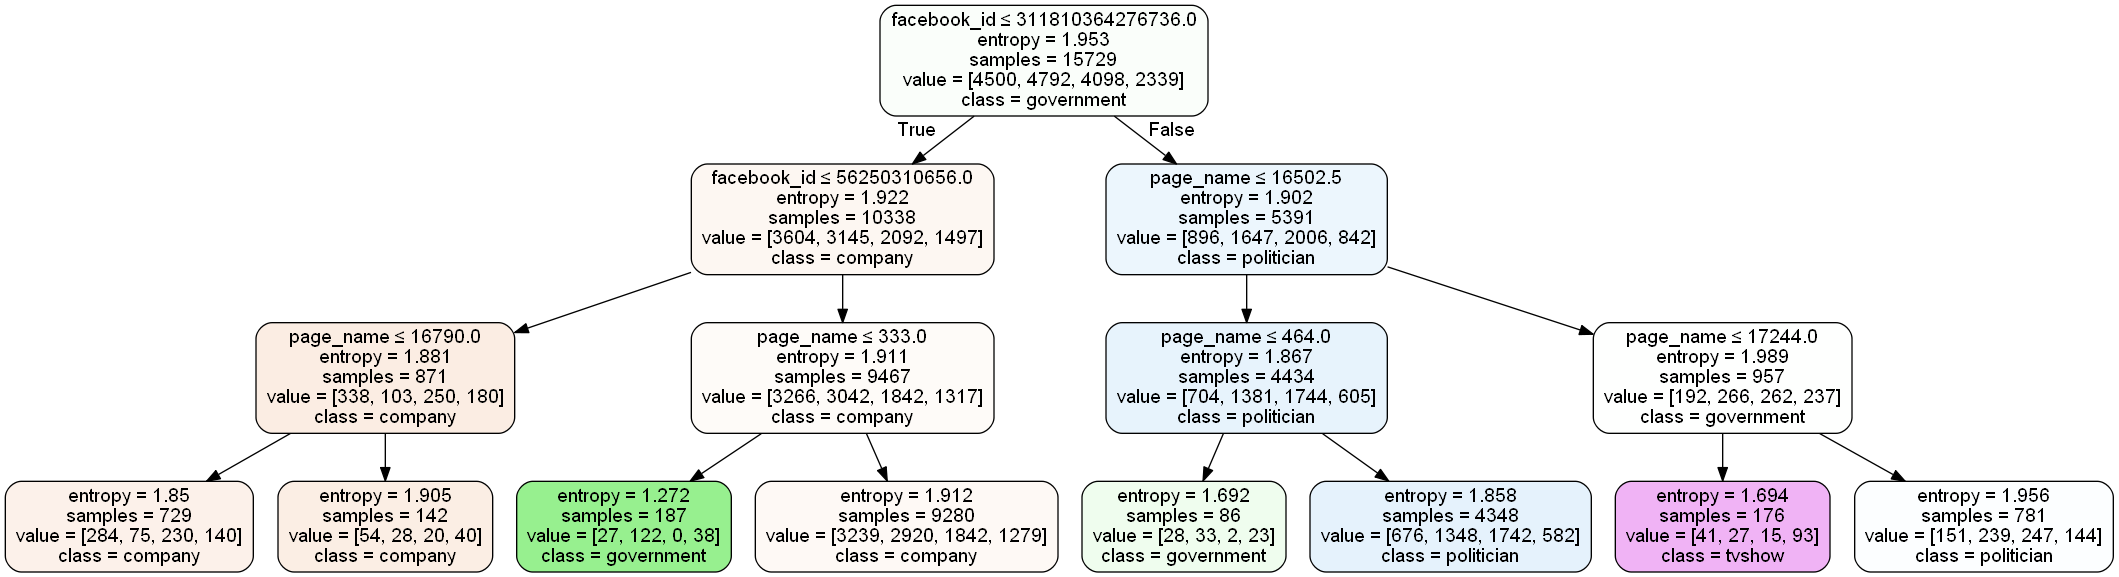

In [9]:
#Decision Tree Visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = X.columns.tolist(),class_names=['company','government','politician','tvshow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())

In [10]:
#Naive Bayes

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred2 = gnb.predict(X_test)
print("\n------Naive Bayes------\n")

# Predicted values
print("Predicted values:",Y_pred2)

#Confusion Matrix
print("\nConfusion Matrix: \n\n",confusion_matrix(Y_test, Y_pred2))

#Model Accuracy, how often is the classifier correct?
print("\nAccuracy:",metrics.accuracy_score(Y_test, Y_pred2)*100)

# Report containing precision,recall,f1-score,support
print("\nReport--> \n",classification_report(Y_test, Y_pred2))


------Naive Bayes------

Predicted values: ['politician' 'company' 'company' 'company' 'government' 'company'
 'company' 'company' 'company' 'company' 'company' 'company' 'politician'
 'company' 'tvshow' 'company' 'company' 'company' 'company' 'company'
 'company' 'company' 'company' 'company' 'government' 'company' 'company'
 'politician' 'company' 'company' 'company' 'company' 'company' 'company'
 'company' 'company' 'company' 'politician' 'company' 'company'
 'politician' 'government' 'company' 'company' 'company' 'company'
 'company' 'company' 'company' 'politician' 'company' 'government'
 'company' 'company' 'government' 'company' 'company' 'company' 'company'
 'company' 'company' 'company' 'company' 'company' 'company' 'company'
 'government' 'company' 'company' 'company' 'government' 'company'
 'government' 'company' 'politician' 'company' 'politician' 'politician'
 'company' 'government' 'company' 'company' 'politician' 'company'
 'politician' 'government' 'company' 'company' 

In [11]:
#Encoding the predicted attribute value to convert into numreic values
Y1 = LabelEncoder().fit_transform(Y_pred1)
Y2 = LabelEncoder().fit_transform(Y_pred2)

In [12]:
# Calculating the probabilities for the target in array form, where each row has the probability of the predicted output to 
# belong to that particular class (so we'll get here a (N x 4) size array)
#Predicted probabiltiy of Decision Tree testing data (feature attributes)
dt_probs = clf.predict_proba(X_test)
#Predicted probabiltiy of Naive-Bayes testing data (feature attributes)
nb_probs = gnb.predict_proba(X_test)

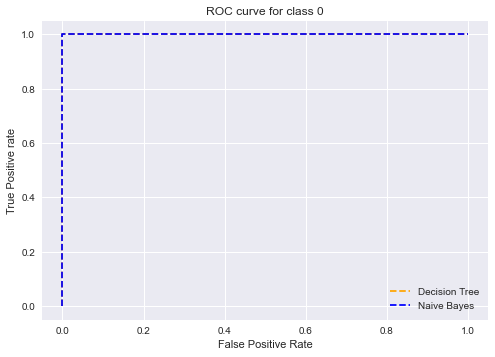

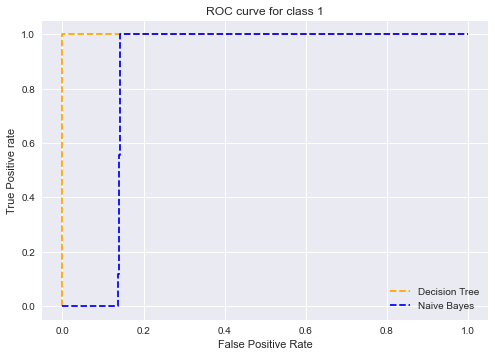

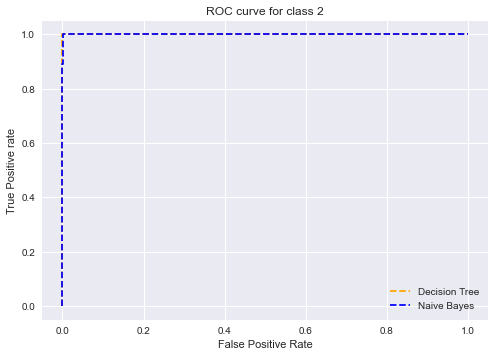

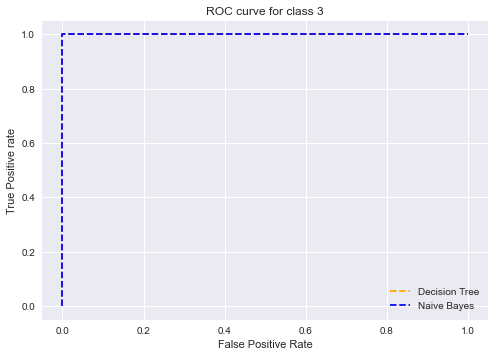

In [13]:
#Plotting the ROC Curve for both the classification algorithms for each of the 5 classes.
n_class = 4
for i in range(n_class):
#In each iteration, giving roc_curve the ith index class' predicted probability and setting corresponding class as pos_label
    d_probs = dt_probs[:,i]
    n_probs = nb_probs[:,i]
    dt_fpr, dt_tpr, _ = roc_curve(Y1, d_probs, pos_label=i)
    nb_fpr, nb_tpr, _ = roc_curve(Y2, n_probs, pos_label=i)
    plt.style.use('seaborn')
    plt.plot(dt_fpr, dt_tpr, linestyle='--',color='orange', label='Decision Tree')
    plt.plot(nb_fpr, nb_tpr, linestyle='--',color='blue', label='Naive Bayes')
    plt.title('ROC curve for class {0}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend()
    # plt.savefig('ROC',dpi=300)
    plt.show();

In [14]:
#AUC Score for both the Classification methods as per the graph outputs above
dt_auc = roc_auc_score(Y1, dt_probs, multi_class='ovo')
nb_auc = roc_auc_score(Y2, nb_probs, multi_class='ovo')
print('Area under Decision Tree Curve:',dt_auc)
print('Area under the Naive-Bayes Curve:',nb_auc)

Area under Decision Tree Curve: 1.0
Area under the Naive-Bayes Curve: 0.8700030743496935


As in case of multi-class problems if we want to use ROC, we would need to binarize the class labels (since ROC works for binary class problems). Now for instance if we are using the one-vs-one configuration ('ovo'), and the classifier distributes the mis-classifications (false positives and false negatives) uniformly across many (or even all) classes, we will inevitably have small number of false positives and small number of false negatives for any pair of classes. Consequently, less number of false positives and false negatives will amount to high true positive rate and low false positive rate and ergo a high AUC. Since this does not really mean the classifications are mostly correct we are getting a low score on accuracy, precision or recall, but the auc value is almost perfect (1 and 0.87)

### Question 2
##### Write a program to show the implementation of agglomerative hierarchical clustering (single, complete and average linkage) using the below mentioned dataset. Show the resultant clusters using graph and dendrogram.
##### (A)Consider Euclidean distance as measure
##### (B)Handle missing values, if any.

In [16]:
#Importing the dataset
dataset = pd.read_excel('Absenteeism_at_work.xls',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


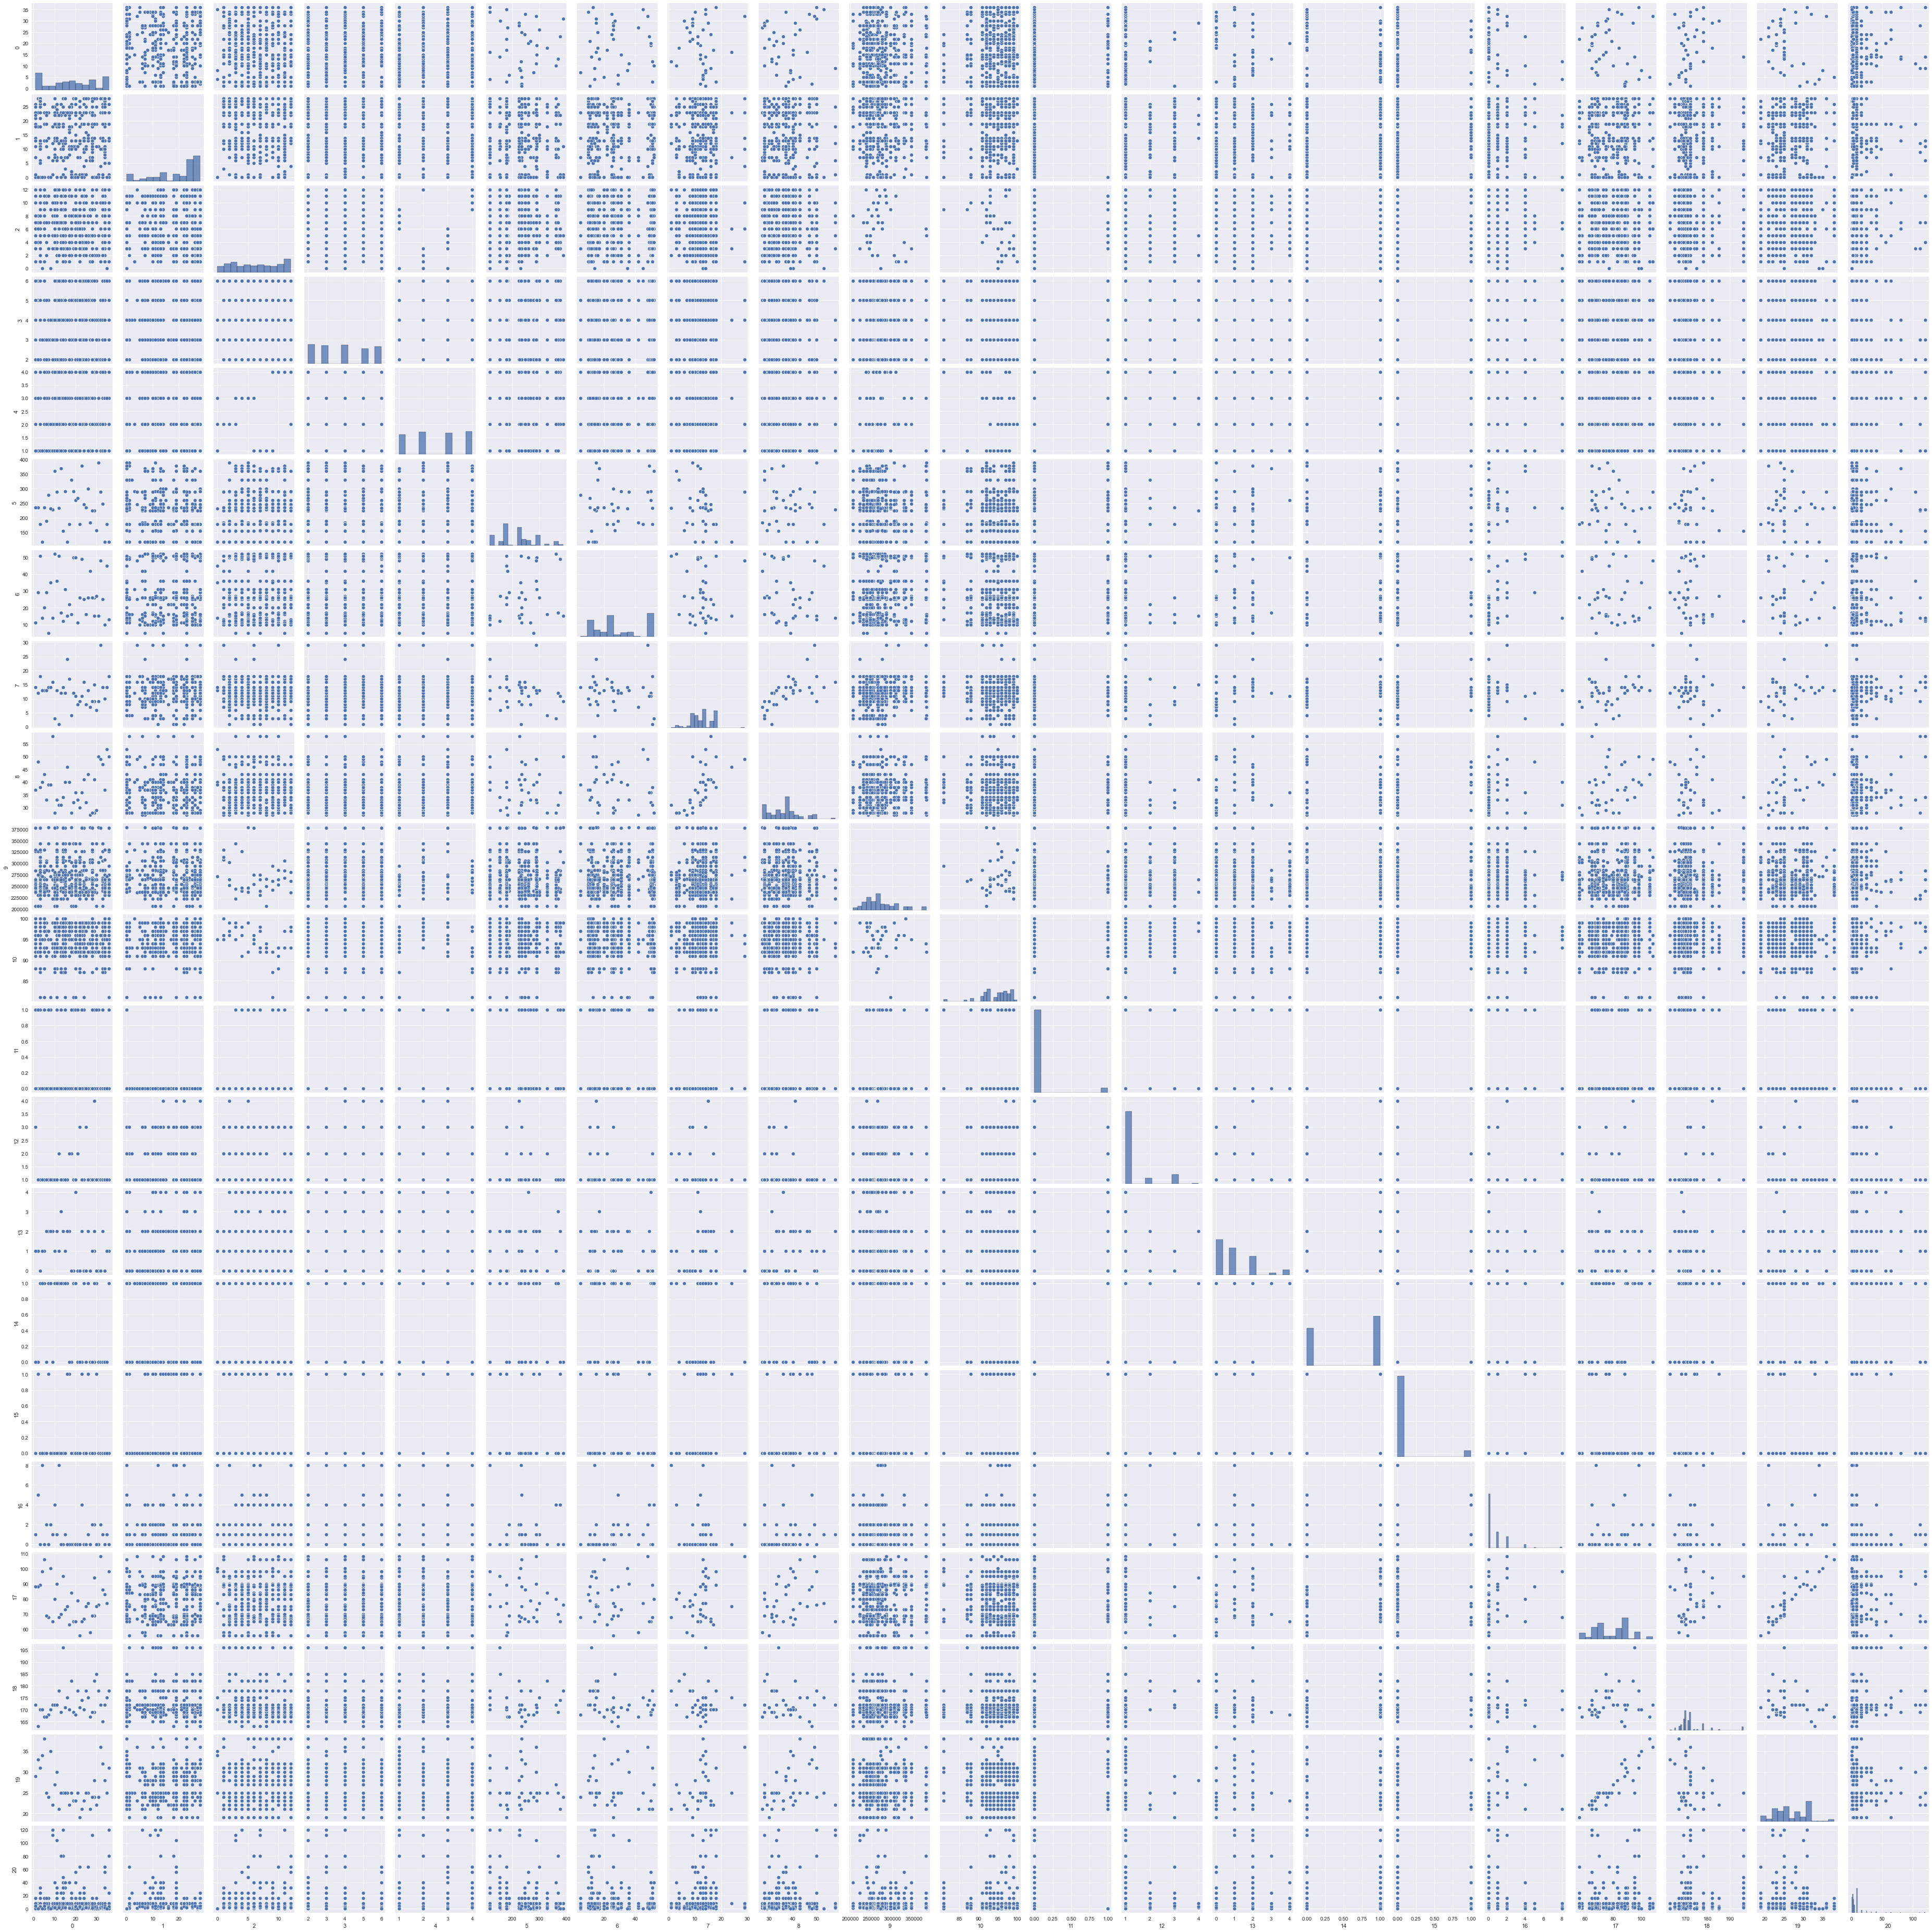

In [17]:
#Since the dataset has no header attributes specified, we plotted the pairplot for the provided dataset and took the two
#attributes whose pairplot showed positive regression.
sns.pairplot(dataset)

In [18]:
#From the above pairplot, we can see that the columns of 'Work load Average/day' and 'Age' show a positive corelation and since
#positive corelation is good for clustering, hence we chose these two columns to perform clustering upon the given datset
X = dataset.iloc[:, [8, 9]].values #workload avg and age

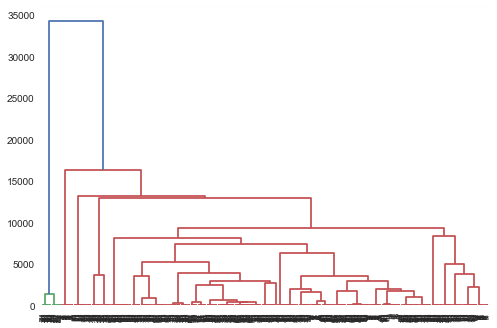

In [19]:
#Single Linkage Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

Text(0, 0.5, 'Workload Average/day')

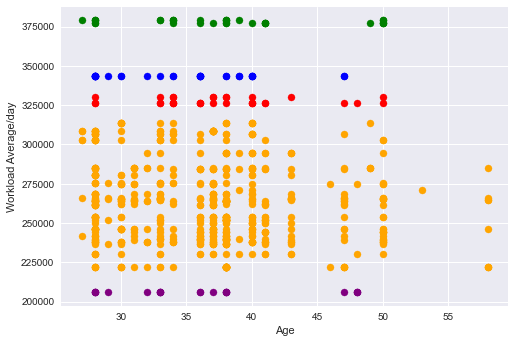

In [20]:
#Single Linkage Graph
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='single')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/day")

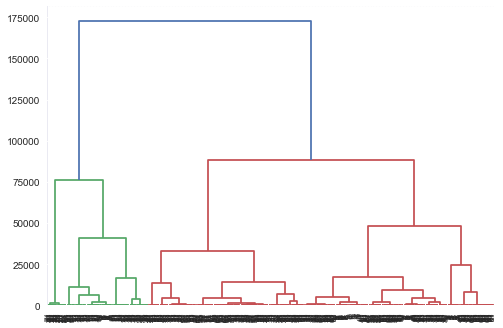

In [21]:
#Complete Linkage Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

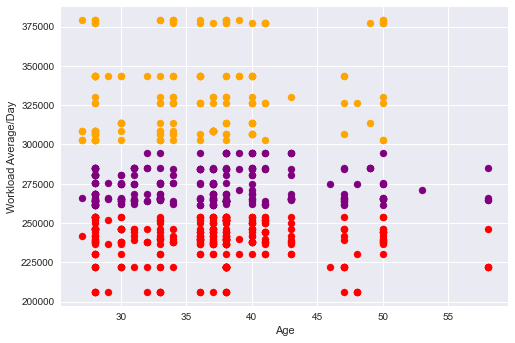

In [22]:
#Complete Linkage Graph
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/Day")
plt.show()

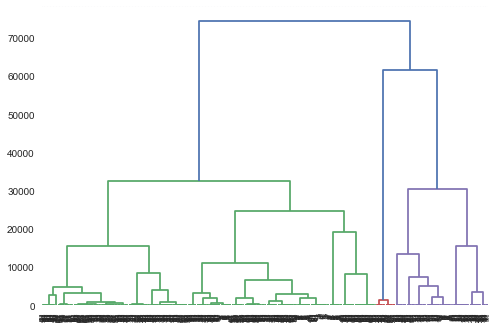

In [23]:
#Average Link Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

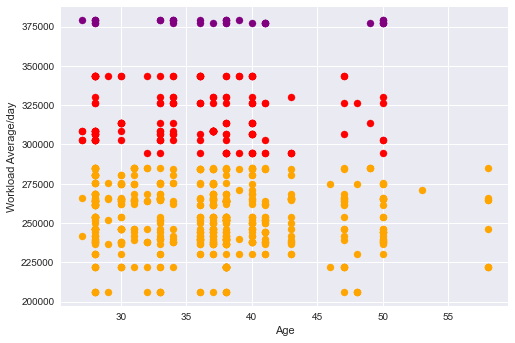

In [24]:
#Average Link Graph
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/day")
plt.show()

### Question 3
##### Write a program to show the implementation of apriori algorithm using web log usage data for web usage mining purpose. (Consider any publicly available web log data to show the implementation.)
##### We have used the dataset available at the below attached link:
##### https://www.kaggle.com/shawon10/web-log-dataset

In [25]:
weblog = pd.read_csv("weblog.csv")
weblog.info() #basic info of the dataset
weblog.IP.unique() #unique IPs that exist in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      16007 non-null  object
 1   Time    16007 non-null  object
 2   URL     16007 non-null  object
 3   Staus   16007 non-null  object
dtypes: object(4)
memory usage: 500.3+ KB


array(['10.128.2.1', '10.131.2.1', '10.130.2.1', '10.129.2.1',
       '10.131.0.1', 'chmod:', 'rm:', 'timeout:', 'sh:', 'a.out:', '[Tue',
       '[Wed', '[Thu', '[Fri', '[Sat', '[Mon'], dtype=object)

In [26]:
#Removing the irrelavant IP Addresses
weblog = weblog[weblog.IP != 'chmod:']
weblog = weblog[weblog.IP != 'rm:']
weblog = weblog[weblog.IP != 'timeout:']
weblog = weblog[weblog.IP != 'sh:']
weblog = weblog[weblog.IP != 'a.out:']
weblog = weblog[weblog.IP != '[Tue']
weblog = weblog[weblog.IP != '[Wed']
weblog = weblog[weblog.IP != '[Thu']
weblog = weblog[weblog.IP != '[Fri']
weblog = weblog[weblog.IP != '[Sat']
weblog = weblog[weblog.IP != '[Mon']

In [27]:
#Import Apyori algorithm and make list of lists as input for apriori algorithm
from apyori import apriori
observations = []
for i in range(len(weblog)):
    observations.append([str(weblog.values[i,j]) for j in range(4)])
#Printing first 50 observations
for i in range(50):
    print(observations[i])

['10.128.2.1', '[29/Nov/2017:06:58:55', 'GET /login.php HTTP/1.1', '200']
['10.128.2.1', '[29/Nov/2017:06:59:02', 'POST /process.php HTTP/1.1', '302']
['10.128.2.1', '[29/Nov/2017:06:59:03', 'GET /home.php HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:04', 'GET /js/vendor/moment.min.js HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:06:59:06', 'GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:06:59:19', 'GET /profile.php?user=bala HTTP/1.1', '200']
['10.128.2.1', '[29/Nov/2017:06:59:19', 'GET /js/jquery.min.js HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:19', 'GET /js/chart.min.js HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:30', 'GET /edit.php?name=bala HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:37', 'GET /logout.php HTTP/1.1', '302']
['10.131.2.1', '[29/Nov/2017:06:59:37', 'GET /login.php HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:07:00:19', 'GET /login.php HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:07:00:21',

In [28]:
#Create Apriori Model and view the resultant rules
#We can see the URLs a single IP will visit given the status code it receives.
association_rules = apriori(observations, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=3)
association_results = list(association_rules)
for i in range(len(association_results)):
    print(association_results[i])
    print("\n")

RelationRecord(items=frozenset({'GET / HTTP/1.1', '302'}), support=0.046868072708847935, ordered_statistics=[OrderedStatistic(items_base=frozenset({'302'}), items_add=frozenset({'GET / HTTP/1.1'}), confidence=0.21154945683247572, lift=3.879389516757212), OrderedStatistic(items_base=frozenset({'GET / HTTP/1.1'}), items_add=frozenset({'302'}), confidence=0.859465737514518, lift=3.8793895167572114)])


RelationRecord(items=frozenset({'GET /home.php HTTP/1.1', '302'}), support=0.1366140984229527, ordered_statistics=[OrderedStatistic(items_base=frozenset({'302'}), items_add=frozenset({'GET /home.php HTTP/1.1'}), confidence=0.6166380789022299, lift=3.6879161468891315), OrderedStatistic(items_base=frozenset({'GET /home.php HTTP/1.1'}), items_add=frozenset({'302'}), confidence=0.8170454545454545, lift=3.6879161468891315)])


RelationRecord(items=frozenset({'POST /action.php HTTP/1.1', '302'}), support=0.005066818671226803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'POST /actio

### Question 4
##### Consider the COVID-19 dataset for India given in the following link.
##### https://www.kaggle.com/sudalairajkumar/covid19-in-india
##### Analyze the dataset by extracting the past 15 days records for each states to cluster them with respect to number of active cases, death rate and recovery rate ratio. [Use any TWO clustering algorithms of your choice and provide the performance analysis of the techniques used w.r.t. results obtained.]

In [2]:
covid = pd.read_csv("covid_19_india.csv")
#Removing any spaces in the attribute names
covid.columns.str.replace(' ', '')

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [3]:
#Handling Missing Data -->
    #1. Substitue all "?" with NaN Values
    #2. For numeric values substitue "NaN" with the attribute mean value
    #3. For other columns substitute with most frequent value
covid = covid.replace("?",np.NaN)
covid = covid.fillna(covid.mean())
for col in covid.columns:
    # Check if the column is of object type
    if covid[col].dtypes == 'object':
        # Impute with the most frequent value
        covid[col] = covid[col].fillna(covid[col].value_counts().index[0])

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14330 entries, 0 to 14329
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14330 non-null  int64 
 1   Date                      14330 non-null  object
 2   Time                      14330 non-null  object
 3   State/UnionTerritory      14330 non-null  object
 4   ConfirmedIndianNational   14330 non-null  object
 5   ConfirmedForeignNational  14330 non-null  object
 6   Cured                     14330 non-null  int64 
 7   Deaths                    14330 non-null  int64 
 8   Confirmed                 14330 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1007.7+ KB


In [5]:
covid[["Confirmed","Deaths", "Cured"]]


,Confirmed,Deaths,Cured
0,1,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,3,0,0
...,...,...,...
14325,419966,2150,345683
14326,34862,396,33549
14327,162562,2309,117221
14328,1153097,11678,834961


In [6]:
#K-Means Analysis (We cluster based on 3 parameters - confirmed cases, cured cases and cases which resulted deaths)
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)
kmeans.fit(covid[["Confirmed","Deaths", "Cured"]])
print("K-Means Labels")
kmeans.labels_

K-Means Labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

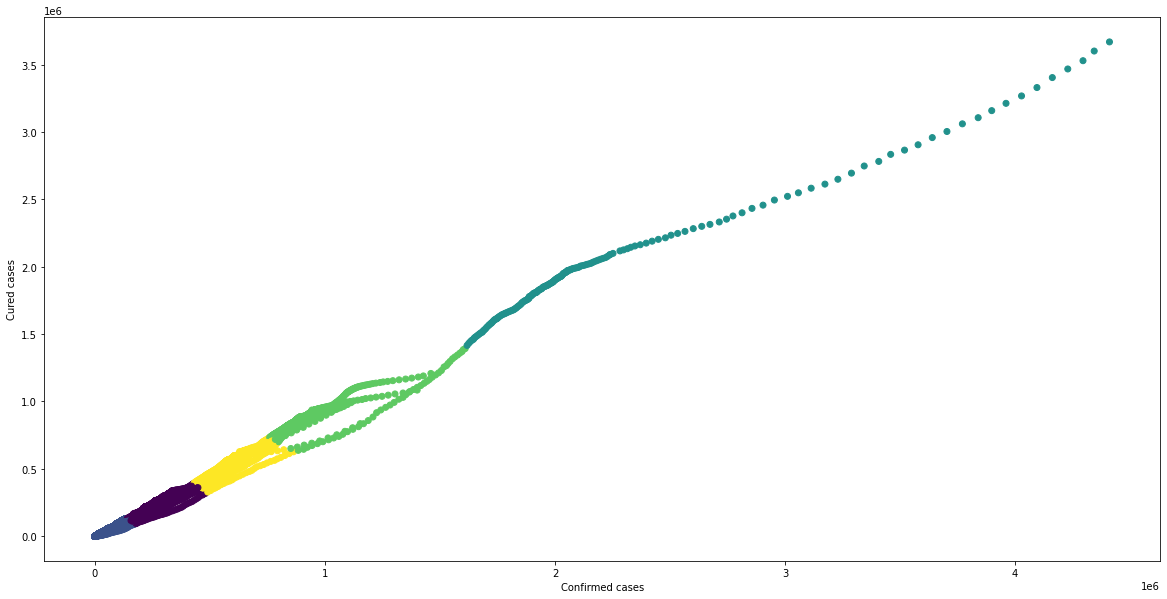

In [7]:
plt.scatter(covid["Confirmed"], covid["Cured"], c=kmeans.labels_)
plt.xlabel("Confirmed cases")
plt.ylabel("Cured cases")
plt.gcf().set_size_inches((20, 10))

#Try labelling the states but does not look good. So skip

# xs = pd.Series(covid['Deaths'])
# ys = pd.Series(covid['Confirmed'])
# for x,y in zip(xs,ys):
#     i = 0
#     label = covid["State/UnionTerritory"][i]
#     i = i+1
# plt.annotate(label, # this is the text
#             (x,y), # this is the point to label
#             textcoords="offset points", # how to position the text
#             xytext=(0,10), # distance from text to points (x,y)
#             ha='center') # horizontal alignment can be left, right or center

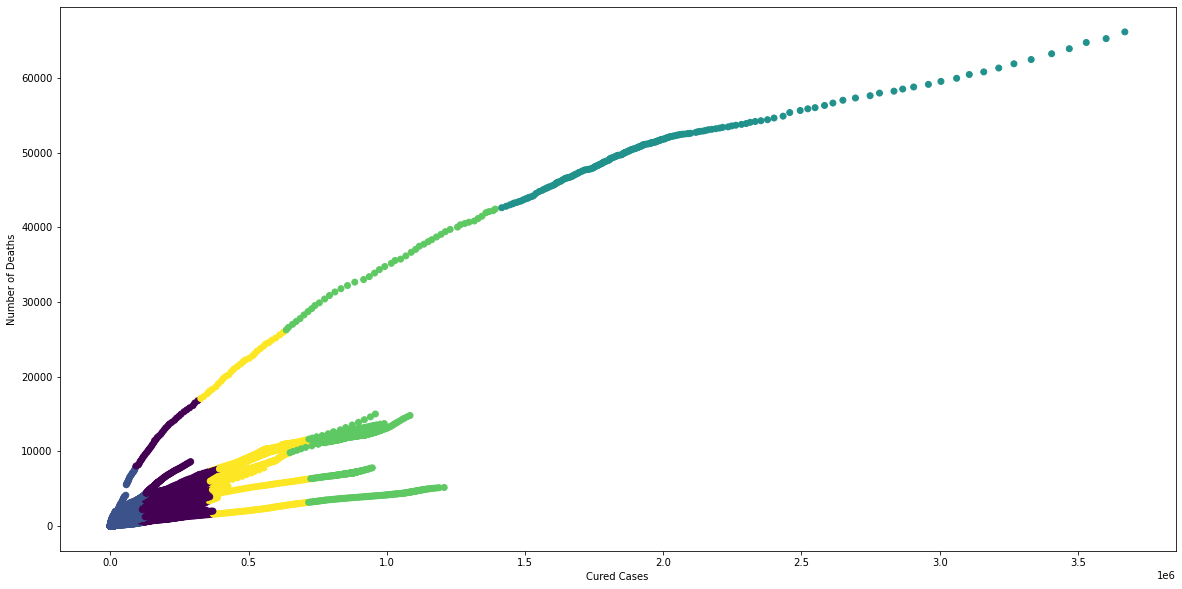

In [8]:
#Cured cases vs Number of Deaths
plt.scatter(covid["Cured"], covid["Deaths"], c=kmeans.labels_)
plt.xlabel("Cured Cases")
plt.ylabel("Number of Deaths")
plt.gcf().set_size_inches((20, 10))

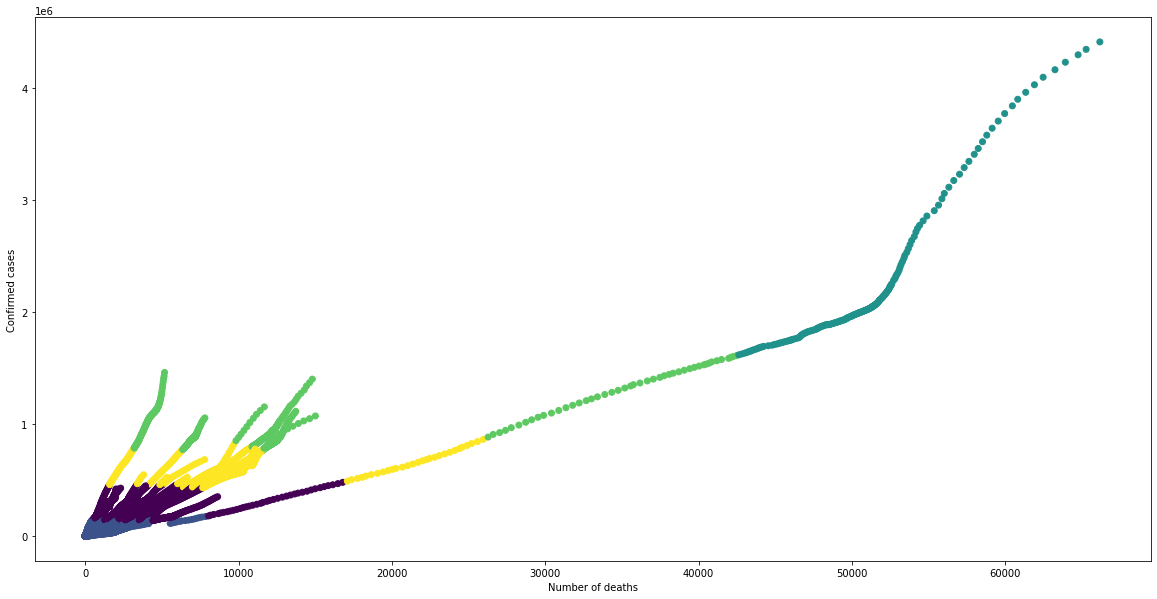

In [9]:
#Number of deaths vs Confirmed cases
plt.scatter(covid["Deaths"], covid["Confirmed"], c=kmeans.labels_)
plt.xlabel("Number of deaths")
plt.ylabel("Confirmed cases")
plt.gcf().set_size_inches((20, 10))

In [10]:
#Agglomerative Clustering (Again we cluster based on 3 parameters - confirmed cases, cured cases and number of deaths)

agglomerative = AgglomerativeClustering()
# fit model and predict clusters
yhat = agglomerative.fit_predict(covid[["Confirmed","Deaths", "Cured"]])
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
#find number of clusters created
clusters = unique(yhat)
clusters

#Get row indexes of samples in each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    print(row_ix)

(array([ 4935,  4970,  5005,  5040,  5075,  5110,  5145,  5180,  5215,
        5250,  5285,  5320,  5355,  5390,  5425,  5460,  5495,  5530,
        5565,  5600,  5635,  5670,  5705,  5740,  5775,  5810,  5845,
        5880,  5897,  5915,  5932,  5950,  5960,  5967,  5985,  5995,
        6002,  6020,  6030,  6037,  6055,  6065,  6072,  6090,  6100,
        6107,  6125,  6135,  6142,  6160,  6170,  6177,  6195,  6205,
        6212,  6230,  6240,  6247,  6265,  6275,  6282,  6296,  6300,
        6310,  6317,  6331,  6335,  6345,  6352,  6366,  6370,  6380,
        6387,  6401,  6405,  6415,  6422,  6436,  6440,  6450,  6457,
        6471,  6475,  6485,  6492,  6506,  6510,  6520,  6527,  6541,
        6545,  6555,  6562,  6576,  6580,  6590,  6597,  6611,  6615,
        6625,  6632,  6646,  6650,  6660,  6667,  6681,  6685,  6695,
        6702,  6716,  6720,  6730,  6737,  6751,  6755,  6765,  6772,
        6786,  6790,  6800,  6807,  6821,  6825,  6835,  6842,  6856,
        6860,  6870

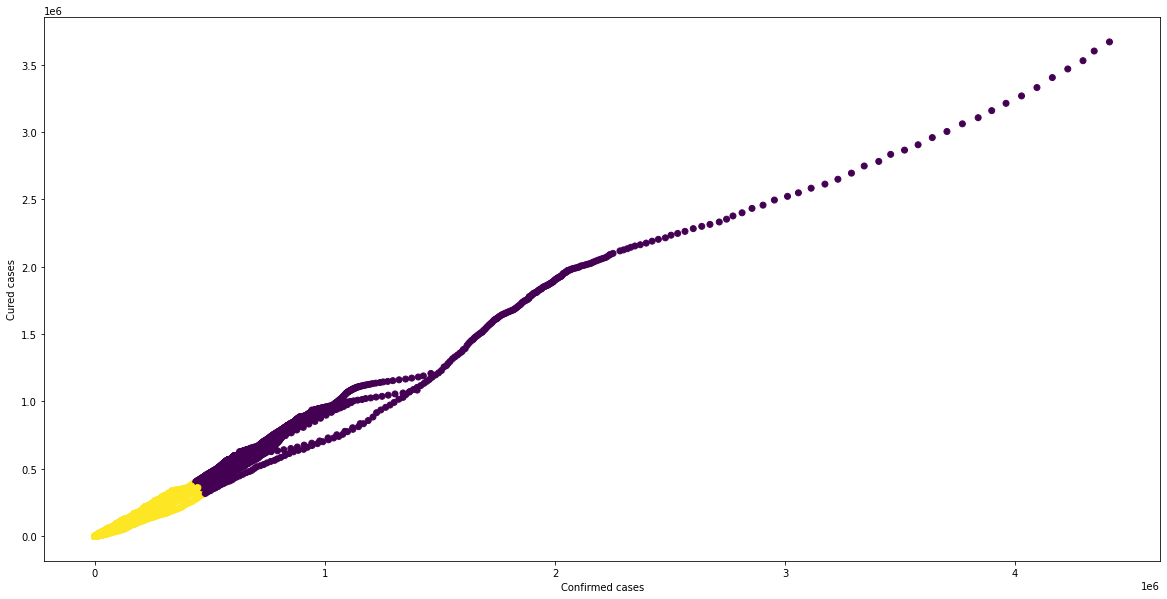

In [12]:
#Confirmed cases vs cured cases

plt.scatter(covid["Confirmed"], covid["Cured"], c=yhat)
plt.xlabel("Confirmed cases")
plt.ylabel("Cured cases")
plt.gcf().set_size_inches((20, 10))

#Try labelling the states but does not look good. So skip

# xs = pd.Series(covid['Deaths'])
# ys = pd.Series(covid['Confirmed'])
# for x,y in zip(xs,ys):
#     i = 0
#     label = covid["State/UnionTerritory"][i]
#     i = i+1
# plt.annotate(label, # this is the text
#             (x,y), # this is the point to label
#             textcoords="offset points", # how to position the text
#             xytext=(0,10), # distance from text to points (x,y)
#             ha='center') # horizontal alignment can be left, right or center

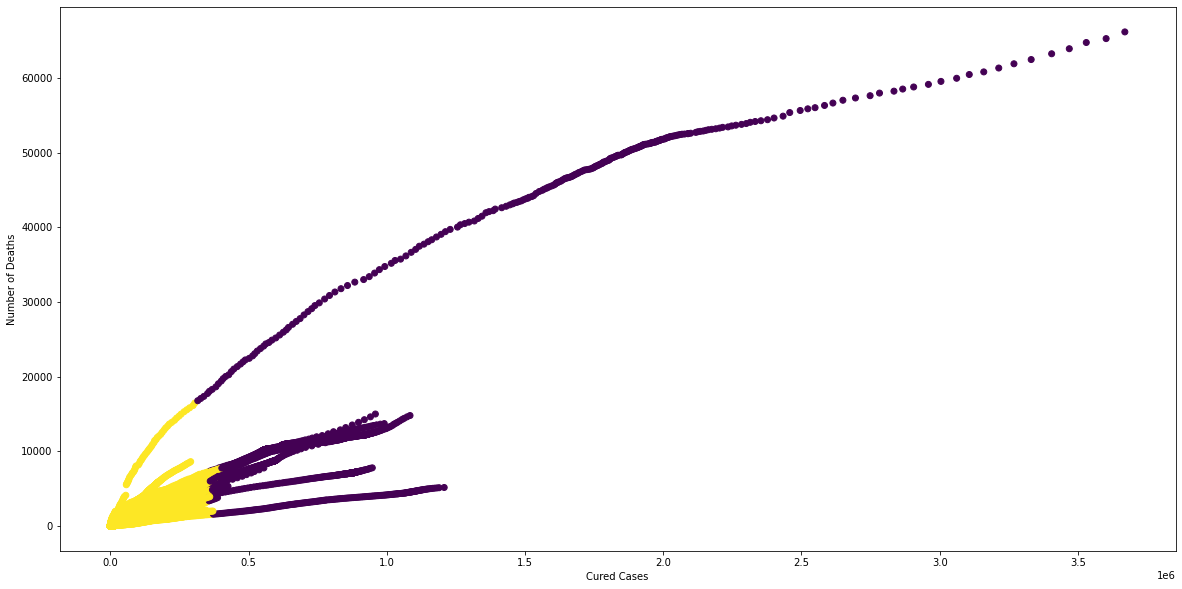

In [13]:
#Cured cases vs Number of Deaths
plt.scatter(covid["Cured"], covid["Deaths"], c=yhat)
plt.xlabel("Cured Cases")
plt.ylabel("Number of Deaths")
plt.gcf().set_size_inches((20, 10))

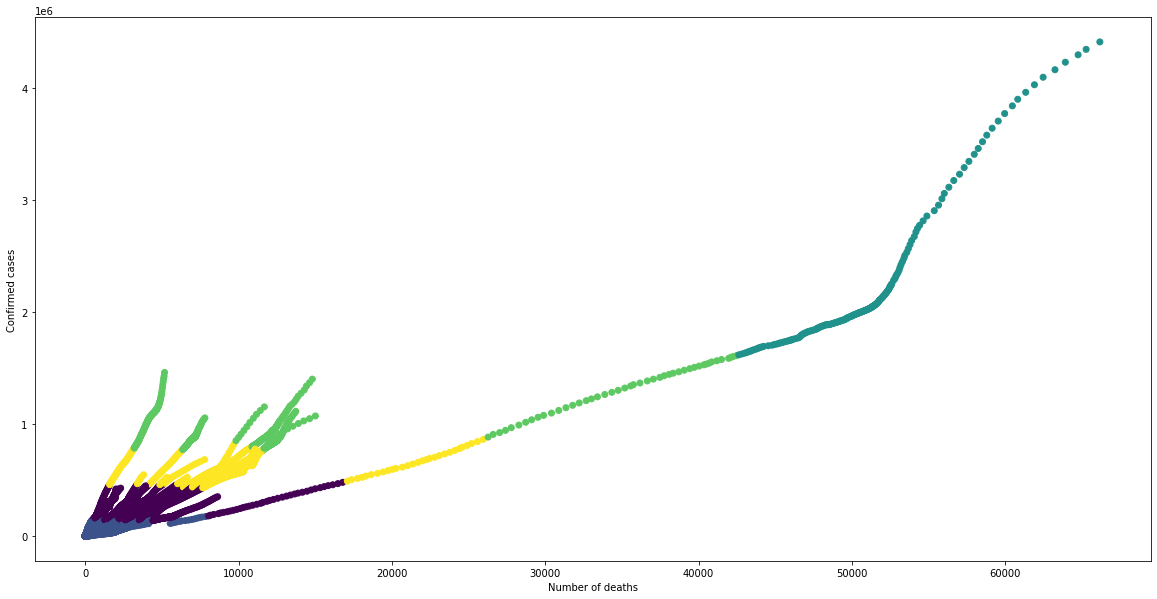

In [14]:
#Number of deaths vs Confirmed cases
plt.scatter(covid["Deaths"], covid["Confirmed"], c=kmeans.labels_)
plt.xlabel("Number of deaths")
plt.ylabel("Confirmed cases")
plt.gcf().set_size_inches((20, 10))

In [15]:
#Clustering Algorithms can be evaluated by the following methods 1. Clustering Tendency 2. Number of Clusters 
#3. Clustering Quality.
#We have used Hopkins Statistic, VAT statistic and iVAT statistic
#Hopkins Statistic
X = scale(covid[["Confirmed","Deaths", "Cured"]])
print("Hopkins Score:",hopkins(X,150))

Hopkins Score: 0.000950640711941203


In [ ]:
vat(X)

In [17]:
ivat(X)